# Hypotheses generation
Store Level Hypotheses
Hypotheses name	Description	Variable
Population Density	Stores located in densely populated areas should have higher sales because of more demand	N/A
Store Capacity	Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place	outlet_size / outlet_type
Store location	Stores located in urban cities should have higher sales because of the higher income levels of people there. Stores that are in neighbourhoods that are recidential or where there are many offices will have higher sales because of better access to costumers. Also stores keeping the right set of products to meet the local needs of customers will have higher sales	outlet_location_type
Store age	Stores that have been in the same place for a very long time may have higher sales because personal relationships with local costumers have been built	outlet_stablishment_year
Store maintenance	Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales	N/A
Competitors	Stores having similar establishments nearby should have less sales because of more competition	N/A
Product Level Hypotheses
Hypotheses name	Description	Variable
Utility	Daily use products should have a higher tendency to sell as compared to the specific use products. Also products such are ready-made-meals, fruits and snacks	item_type/item_weight?/item_fat_content?
Display Area and visibility	Products which are given bigger shelves in the store, probably towards the entrance, are likely to catch attention first and sell more	item_visibility
Advertising	Better advertising of products in the store will should higher sales in most cases	N/A
Promotional Offers	Products accompanied with attractive offers and discounts will sell more	N/A

In [1]:
 #This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import os 

#chine learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
#from catboost import CatBoostClassifier, Pool, cv

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [2]:
Path = 'C:\\Users\\sg25017\\Documents\\ZS DSA\\Analytics Vidhya\\Big Mart Sales Prediction'
os.listdir(Path)

['.ipynb_checkpoints',
 'Big Mart Sales Prediction - Shortcut.lnk',
 'Big Mart Sales.ipynb',
 'Github',
 'model1.csv',
 'model2.csv',
 'model3.csv',
 'sample_submission_8RXa3c6.csv',
 'submission1_Sg.csv',
 'test_AbJTz2l.csv',
 'train_v9rqX0R.csv']

In [3]:
train_data = pd.read_csv(Path + '\\train_v9rqX0R.csv')
test_data = pd.read_csv(Path + '\\test_AbJTz2l.csv')
sample_submission = pd.read_csv(Path + '\\sample_submission_8RXa3c6.csv')

In [4]:
train_data.shape,test_data.shape, sample_submission.shape

((8523, 12), (5681, 11), (5681, 3))

In [5]:
train_data['Source'] = 'Train'
test_data['Source'] = 'Test'

In [6]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [8]:
#Examine Missing Values
#Next we can look at the number and percentage of missing values in each column

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [9]:

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
missing_data(data)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
Total,0,2439,0,0,0,0,0,0,4016,0,0,5681,0
Percent,0,17.1712,0,0,0,0,0,0,28.2737,0,0,39.9958,0
Types,object,float64,object,float64,object,float64,object,int64,object,object,object,float64,object


In [11]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
Source                           2
dtype: int64

In [12]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', ]]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories f

# Impute missing values

Item_Weight
Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the average Item_Weight of each Item_Identifier.

To check that we have imputed the values in a reasonable way, we can check the average weight per Outlet_Identifier before and after imputing the missing values.

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

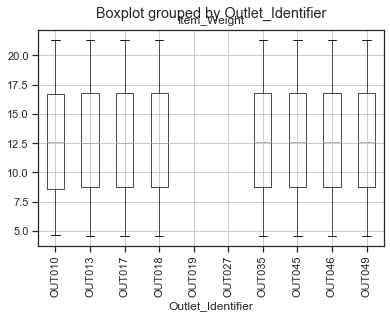

In [13]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

In [14]:
# average weight per item
item_av_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier', aggfunc ={'median', 'mean', 'min','sum'})
item_av_weight.head()

,mean,median,min,sum
Item_Identifier,,,,
DRA12,11.600,11.600,11.600,92.80
DRA24,19.350,19.350,19.350,154.80
DRA59,8.270,8.270,8.270,66.16
DRB01,7.390,7.390,7.390,44.34
DRB13,6.115,6.115,6.115,48.92


In [15]:
# create a mask of the missing data in Item_Weight
null_mask_weight = data['Item_Weight'].isnull()

# impute values
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])


Text(0.5, 1.0, '')

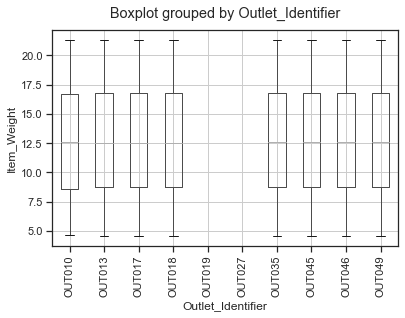

In [16]:
ax = data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Weight')
ax.set_title('')

Outlet_Size
It could be reasonable to impute the missing values of Outlet_size by the mode size for each Outlet_Type.

Let's have a look at the mode size for each Outlet_Type.

In [17]:
from scipy.stats import mode

# replace all nan values with 'unknown', because the mode function of stats can not compare a float (NaN) and a string
data['Outlet_Size'] = data['Outlet_Size'].fillna('unknown')

# mode size per Outlet_Type
outlet_type_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Grocery stores could be considered to be smaller than the supermarkets, so we could replace the 'unknown' in the pivot table above by 'small', but let's check the the sales in each Outlet_Type to see if we can confirm this.

Text(0.5, 1.0, '')

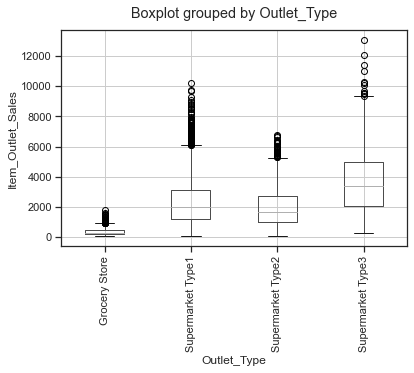

In [18]:
# sales per Outlet_Type
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

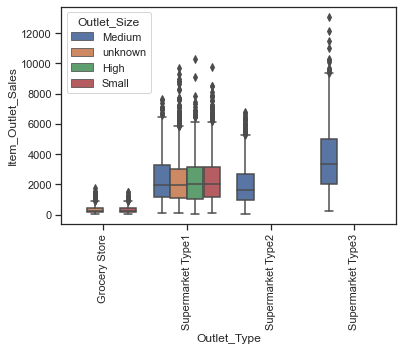

In [19]:
import seaborn as sns
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Grocery stores report far fewer sales than the other Outlet_Types and they have Outlet_Size values that are either 'small' or 'unknown'. Therefore we can reasonably replace the mode value of Grocery Stores with 'small' and impute the missing values of Outlet_Size with the mode value for each Outlet_Type. To check we have done this correctly, we can visualise the Item_Outlet_Sales per Outlet_Identifier.

Note also that Type 2 stores are all medium and Type 3 are also all medium size. Type 1 stores have all sizes, which all have similar sales

Text(0.5, 1.0, '')

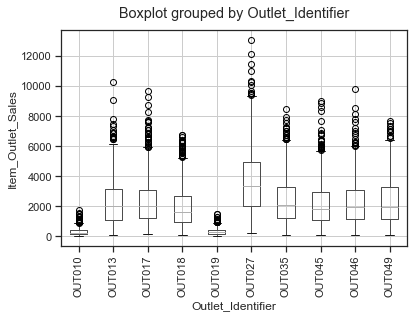

In [20]:
# sales per Outlet_Identifier
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')


In [21]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,unknown
OUT013,High
OUT017,unknown
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,unknown
OUT046,Small


In [22]:
# replace the Outlet_Size of the Grocery Store in the pivot table with small
outlet_type_mode_size.loc['Grocery Store'] = 'Small'
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [23]:
# create a mask of the missing data in Item_Weight
null_mask_size = data['Outlet_Size']=='unknown'

# impute values
data.loc[null_mask_size, 'Outlet_Size'] = data.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_mode_size.loc[x])


In [24]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,Small
OUT013,High
OUT017,Small
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Small
OUT046,Small


Min value of Item_Visibility
The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

We want to replace the 0 values for the mean visibility value of that product in each store.

In [25]:
# check how many entries have 0
data['Item_Visibility'].value_counts().head()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
Name: Item_Visibility, dtype: int64

In [26]:
#879 out of 14204 is a lot so we replace the 0 values for NAN values so the mean value is not affected. 
#visual check that the 0 values in the firs 10 entries have been replaced
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

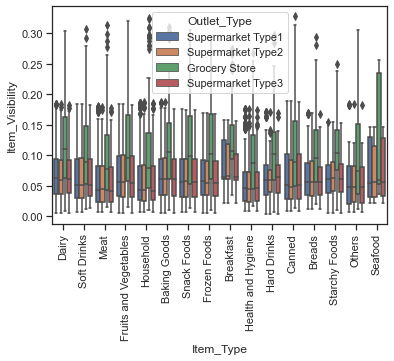

In [27]:
#Check the visibility for each Item_Type in each Outlet_Type.
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [28]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

The Item_Visibility for each Item_Type seems to be very similar for Type 1, 2 and 3 supermarkets and that is lower than for Grocery Sotres; in other words, buying in Grocery Stores is more expensive than in Supermarkets. So we impute missing values for each Item_Type in each Outlet_Type.

In [29]:
# pivot table with the mean values that will be used to replace the nan values
table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [30]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

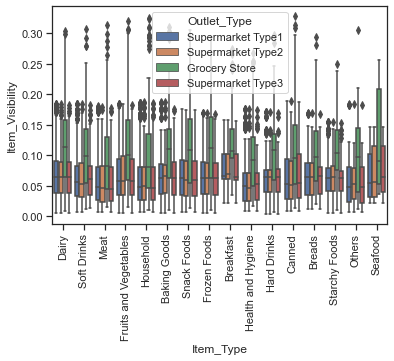

In [31]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [32]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3    0.114820
4    0.057774
5    0.068206
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

# Combine Low Fat, low fat and LF to Low Fat and reg and Regular to Regular

In [33]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [34]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


# Feature Engineering
Convert the Outlet_Establishment_Years into how old the establishments are

In [35]:
data['Outlet_Age'] = 2021 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    22
1    12
2    22
3    23
4    34
Name: Outlet_Age, dtype: int64

In [36]:
data['Outlet_Age'].describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

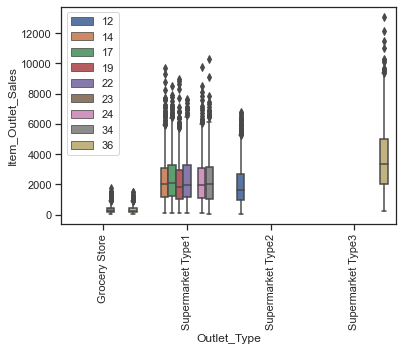

In [37]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')

Supermarket type 3 is the oldest, having been stablished 28 years ago. Type 1 have been build at different times, Type 2 is the newest. Grocery stores are relaviely old.

Create broader category for type of item
Notice the Item_Identifiers all start with letters. Let's see what they are and what they mean.

In [38]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:3]
data['Item_Type_Category'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [39]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

These seem to stand for Food, Drink and Non-Consumable. So rename them to be more intuitive.

In [40]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]

In [41]:
data['Item_Type_Category'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Category, dtype: int64

# Make a new category for items that reflect their sales - very high, high, medium, low

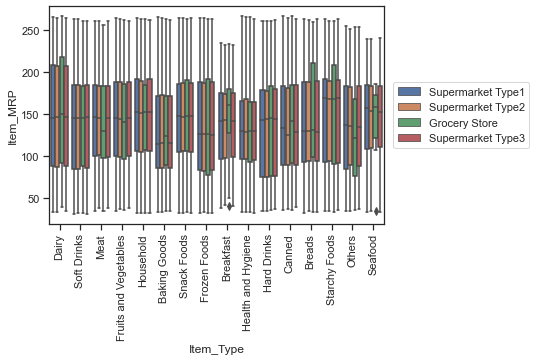

In [42]:
ax = sns.boxplot(data = data, x = 'Item_Type', y = 'Item_MRP', hue = 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90 )
leg = ax.legend()
ax.legend(loc = 'center right', bbox_to_anchor = (1.45,0.5))

All the Item_Types seems to have a similar average Item_MRP accross the Outlet_Types. So we do not need to consider different Item_MRP per Outlet_Type.

Now we can have a look at the distribution of all Item_MRP.

C:\Users\sg25017\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


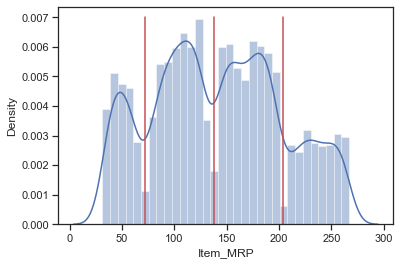

In [43]:
ax = sns.distplot(data['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

The Item_MRP clearly shows there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High', 'Very High'.

In [44]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

data['Item_MRP_Category'] = data['Item_MRP']
data['Item_MRP_Category'] = data['Item_MRP_Category'].apply(price_cat)
data['Item_MRP_Category'].value_counts()

High         4934
Medium       4659
Very High    2400
Low          2211
Name: Item_MRP_Category, dtype: int64

# Analysis
Numerical data

In [45]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.070270,141.004977,1997.830681,2181.288914,23.169319
std,4.652502,0.048750,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.003575,31.290000,1985.000000,33.290000,12.000000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400,17.000000
50%,12.600000,0.060322,142.247000,1999.000000,1794.331000,22.000000
75%,16.750000,0.095967,185.855600,2004.000000,3101.296400,34.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000


Item_MRP
As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outle_Size.

In [46]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
Outlet_Age                      0
Item_Type_Category              0
Item_MRP_Category               0
dtype: int64

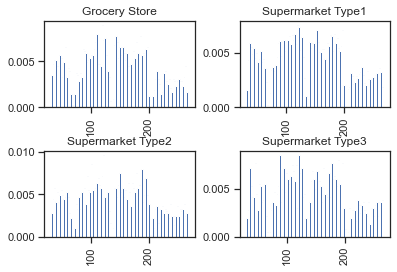

In [47]:
ax = data.hist(column = 'Item_MRP', by = 'Outlet_Type', bins = 100, density = True)

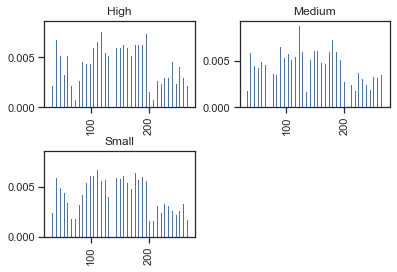

In [48]:
ax = data.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

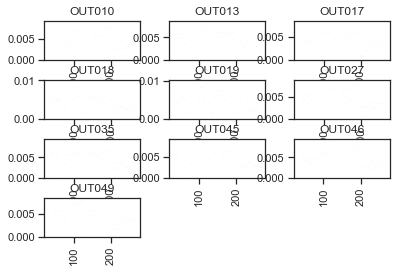

In [49]:
ax = data.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

So the different categories of Item_MRP are well represented accross all outlets.

Explore how Item_MRP depends on Outlet_Type:

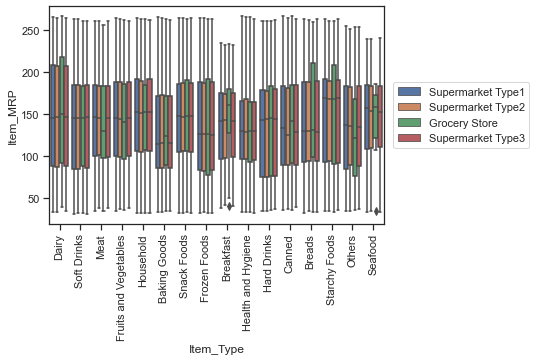

In [50]:
ax = sns.boxplot(data = data, x = 'Item_Type', y = 'Item_MRP' , hue = 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
leg = ax.legend()
ax.legend(loc = 'center right', bbox_to_anchor = (1.45,0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


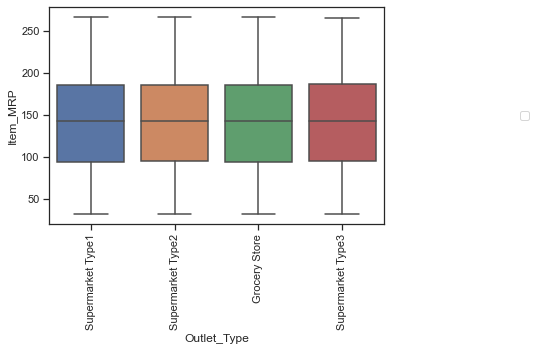

In [51]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_MRP does not differ depending on Outlet_Type.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


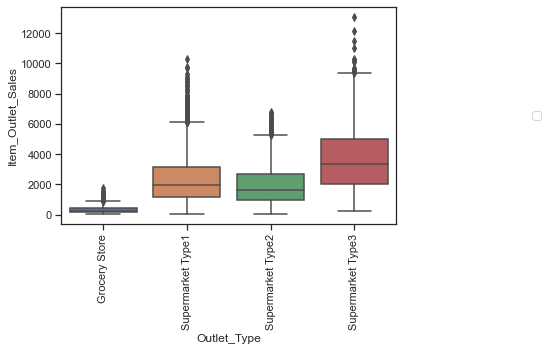

In [52]:
#Item_Outlet_Sales
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_Outlet_Sales are very low for Grocery Stores, even though we saw above the Item_MRP is the same for all Outlet_Types.

Let's Explore if this is because of the Outlet_Size.

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

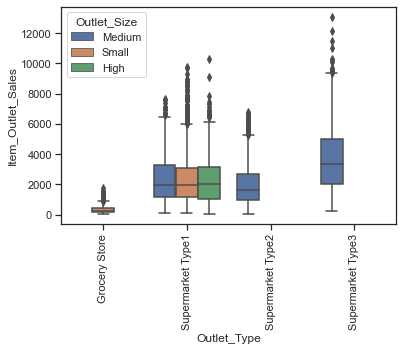

In [53]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

No, it is just about the Grocery Stores. Let's explore how they Item_Types differ depending on Outlet_Type.

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

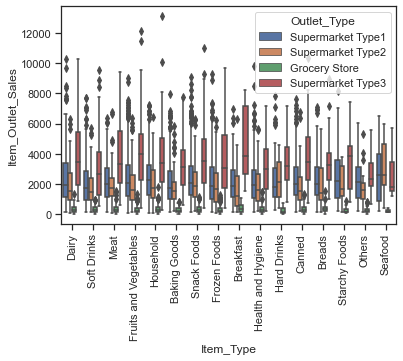

In [54]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Grocery stores just sell a smaller number of everything.

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

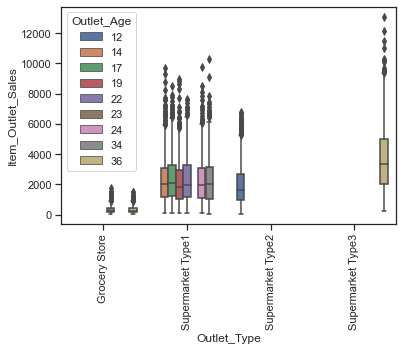

In [55]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Age
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Interestingly, type 3 supermarkets perform the best in pure sales (Item_Outlet_Sales), even though they are the oldest and they are also medium sized.

Now let's explore how each store (Outlet_Identifier) performs in sales:

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

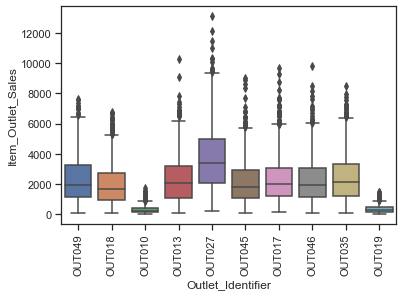

In [56]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


In [57]:
for i in data['Outlet_Identifier'].unique():
    otype = data[data['Outlet_Identifier']==i]['Outlet_Type'].unique()
    osize = data[data['Outlet_Identifier']==i]['Outlet_Size'].unique()
    print('Outlet_Identifier: {}, Outlet_Type(s): {}, Outlet_Size: {}'.format(i, otype, osize))

Outlet_Identifier: OUT049, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT018, Outlet_Type(s): ['Supermarket Type2'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT010, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']
Outlet_Identifier: OUT013, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['High']
Outlet_Identifier: OUT027, Outlet_Type(s): ['Supermarket Type3'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT045, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT017, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT046, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT035, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT019, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']


Again, this confirms that low sales is due to the outlet being a grocery store and not because the size is small.

Item_Number_Sales
Given that the Item_MRP does not change significantly accross the stores, it might be more useful to analyse the number of items sold, not the Item_Outlet_Sales. The Item_Outlet_Sales is the number of items sold times the Item_MRP. So let's make a new variable with the number of items sold (by dividing the Item_Outlet_Sales by Item_MRP)

In [58]:
data['Item_Number_Sales'] = data['Item_Outlet_Sales']/data['Item_MRP']

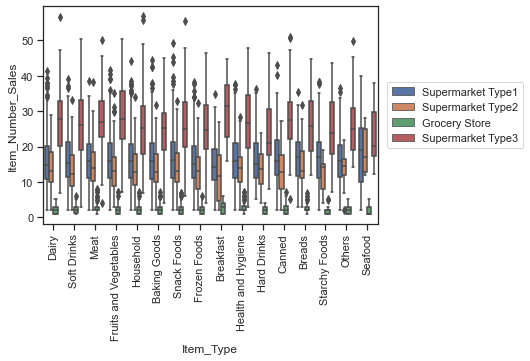

In [59]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Number_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


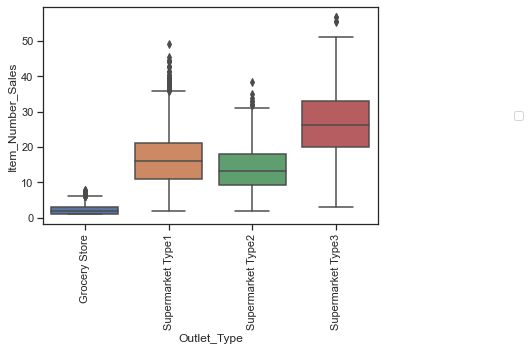

In [60]:

ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

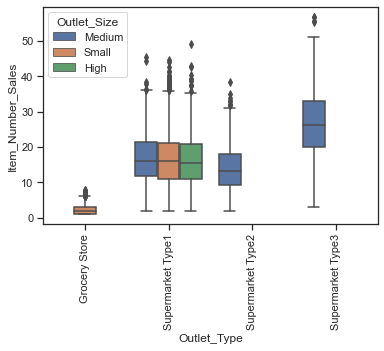

In [61]:

# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


So it is clear that in pure numbers Grocery Stores sell less.

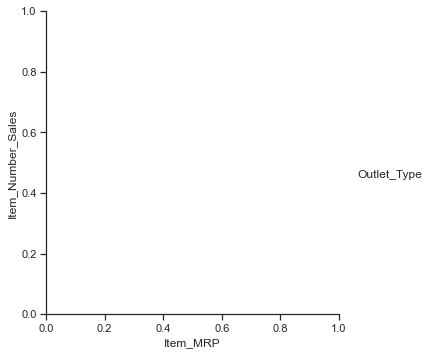

In [62]:
#Item_outlet_sales and Item_MRP vs Item_Visibility
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type', height=5)

C:\Users\sg25017\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


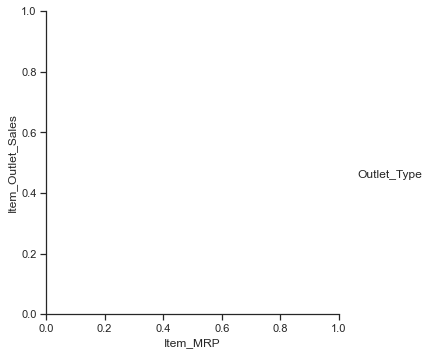

In [63]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [64]:
cor1 = data['Item_Visibility'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_Visibility'].corr(data['Item_Number_Sales'])
print('Correlation between Item_Visibility and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_Visibility and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_Visibility and Item_Outlet_Sales: -0.1407617468766223
Correlation between Item_Visibility and Item_Number_Sales: -0.17440844918045093


In [65]:
data = data.drop(['Outlet_Establishment_Year','Item_Number_Sales'], axis=1)
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Source                   object
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

In [66]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Source',
       'Outlet_Age', 'Item_Type_Category', 'Item_MRP_Category'],
      dtype='object')

In [173]:
from copy import deepcopy
data_copy = deepcopy(data)

Numerical Coding of Categorical Data

In [174]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()



# create variables to keep the information of the Outlet_Identifiers
data_copy['Outlet'] = le.fit_transform(data_copy['Outlet_Identifier'])

# convert all categories of nominal variables into numeric types
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type', 'Item_Type_Category', 
           'Item_MRP_Category', 'Outlet']

le = LabelEncoder()

for i in var_mod:
    data_copy[i] = le.fit_transform(data_copy[i])

In [175]:
data_copy2 = deepcopy(data_copy)

In [176]:
# one-hot coding:  creating dummy variables, one for each category of a categorical variable 
data_copy2 = pd.get_dummies(data_copy2, columns=['Item_Fat_Content', 'Item_Type', 
                                     'Outlet_Location_Type',
                                     'Outlet_Size', 'Outlet_Type', 
                                     'Item_Type_Category', 
                                     'Item_MRP_Category', 'Outlet'])

In [177]:
data_copy2.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Source                     object
Outlet_Age                  int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Type_0                 uint8
Item_Type_1                 uint8
Item_Type_2                 uint8
Item_Type_3                 uint8
Item_Type_4                 uint8
Item_Type_5                 uint8
Item_Type_6                 uint8
Item_Type_7                 uint8
Item_Type_8                 uint8
Item_Type_9                 uint8
Item_Type_10                uint8
Item_Type_11                uint8
Item_Type_12                uint8
Item_Type_13                uint8
Item_Type_14                uint8
Item_Type_15                uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0 

In [178]:
data_copy2.columns.shape

(53,)

In [179]:
data_copy.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
Source                   object
Outlet_Age                int64
Item_Type_Category        int32
Item_MRP_Category         int32
Outlet                    int64
dtype: object

In [180]:
data_copy3 = deepcopy(data_copy2)

In [181]:
data_copy3.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Source,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,Train,22,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,Train,12,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,Train,22,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.114820,182.0950,OUT010,732.3800,Train,23,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.057774,53.8614,OUT013,994.7052,Train,34,1,0,...,0,1,0,0,0,0,0,0,0,0


In [182]:
data_copy3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,11765.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.070270,141.004977,2181.288914,23.169319,0.646649,0.353351,0.076457,0.029288,0.013095,...,0.065123,0.109335,0.108631,0.108843,0.061954,0.109758,0.109124,0.108983,0.109124,0.109124
std,4.652502,0.048750,62.086938,1706.499616,8.371664,0.478027,0.478027,0.265738,0.168617,0.113685,...,0.246751,0.312071,0.311187,0.311453,0.241081,0.312599,0.311806,0.311629,0.311806,0.311806
min,4.555000,0.003575,31.290000,33.290000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.710000,0.033143,94.012000,834.247400,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.060322,142.247000,1794.331000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.750000,0.095967,185.855600,3101.296400,34.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,13086.964800,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
from sklearn import preprocessing

# standardisation of numerical data
X = data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']]
standardized_X = preprocessing.scale(X.values, with_mean=True)
data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']] = standardized_X


In [184]:
data_copy3.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Source,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,-0.750779,-1.112295,249.8092,OUT049,3735.1380,Train,-0.139681,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,-1.477301,-1.046017,48.2692,OUT018,443.4228,Train,-1.334228,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,1.011788,-1.097673,141.6180,OUT049,2097.2700,Train,-0.139681,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,1.377198,0.913882,182.0950,OUT010,732.3800,Train,-0.020226,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,-0.830310,-0.256345,53.8614,OUT013,994.7052,Train,1.293777,1,0,...,0,1,0,0,0,0,0,0,0,0


In [185]:
data_copy3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,1.176500e+04,1.420400e+04,14204.000000,8523.000000,1.420400e+04,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,-2.569602e-16,3.885468e-17,141.004977,2181.288914,6.924825e-17,0.646649,0.353351,0.076457,0.029288,0.013095,...,0.065123,0.109335,0.108631,0.108843,0.061954,0.109758,0.109124,0.108983,0.109124,0.109124
std,1.000043e+00,1.000035e+00,62.086938,1706.499616,1.000035e+00,0.478027,0.478027,0.265738,0.168617,0.113685,...,0.246751,0.312071,0.311187,0.311453,0.241081,0.312599,0.311806,0.311629,0.311806,0.311806
min,-1.770704e+00,-1.368151e+00,31.290000,33.290000,-1.334228e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.775982e-01,-7.615942e-01,94.012000,834.247400,-7.369545e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.145348e-02,-2.040582e-01,142.247000,1794.331000,-1.396807e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.505775e-01,5.271343e-01,185.855600,3101.296400,1.293777e+00,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.839335e+00,5.294947e+00,266.888400,13086.964800,1.532686e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
# divide into train and test
train_s = data_copy3.loc[data_copy3['Source']=='Train']
test_s = data_copy3.loc[data_copy3['Source']== 'Test']

# drop unnecessary columns
train_s.drop(['Source'], axis=1, inplace=True)
test_s.drop(['Item_Outlet_Sales', 'Source'], axis=1, inplace=True)

# export to files

C:\Users\sg25017\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [202]:
# divide into train and test
train = data_copy2.loc[data_copy2['Source']=='Train']
test = data_copy2.loc[data_copy2['Source']=='Test']

# drop unnecessary columns
train.drop(['Source'], axis=1, inplace=True)
test.drop(['Item_Outlet_Sales', 'Source'], axis=1, inplace=True)

In [203]:
# divide into train and test
train_num_cat = data_copy.loc[data_copy['Source']=='Train']
test_num_cat = data_copy.loc[data_copy['Source']=='Test']

# drop unnecessary columns
train_num_cat.drop(['Source'], axis=1, inplace=True)
test_num_cat.drop(['Item_Outlet_Sales', 'Source'], axis=1, inplace=True)


In [233]:
data_copy.isnull().sum()

Item_Identifier            0
Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
Source                     0
Outlet_Age                 0
Item_Type_Category         0
Item_MRP_Category          0
Outlet                     0
dtype: int64

In [204]:
# divide into train and test
train_num_cat = data_copy.loc[data_copy['Source']=='Train']
test_num_cat = data_copy.loc[data_copy['Source']=='Test']

# drop unnecessary columns
train_num_cat.drop(['Source'], axis=1, inplace=True)
test_num_cat.drop(['Item_Outlet_Sales', 'Source'], axis=1, inplace=True)

In [205]:
# divide into train and test
otrain = data.loc[data['Source']=='Train']
otest = data.loc[data['Source']=='Test']

# drop unnecessary columns
otrain.drop(['Source'], axis=1, inplace=True)
otest.drop(['Item_Outlet_Sales', 'Source'], axis=1, inplace=True)

In [206]:
train_s

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,-0.750779,-1.112295,249.8092,OUT049,3735.1380,-0.139681,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,-1.477301,-1.046017,48.2692,OUT018,443.4228,-1.334228,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,1.011788,-1.097673,141.6180,OUT049,2097.2700,-0.139681,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,1.377198,0.913882,182.0950,OUT010,732.3800,-0.020226,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,-0.830310,-0.256345,53.8614,OUT013,994.7052,1.293777,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,-1.274176,-0.276657,214.5218,OUT013,2778.3834,1.293777,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,-0.948531,-0.477709,108.1570,OUT045,549.2850,-0.498045,0,1,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,-0.471348,-0.719689,85.1224,OUT035,1193.1136,-0.736955,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,-1.200019,1.537495,103.1332,OUT018,1845.5976,-1.334228,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [207]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(train_s.loc[:, train_s.columns != 'Item_Outlet_Sales'], train_s['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train_s = X_train_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test_s = X_test_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train_s.shape, y_train_s.shape)
print(X_test_s.shape, y_test_s.shape)

(6818, 49) (6818,)
(1705, 49) (1705,)


In [208]:
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'Item_Outlet_Sales'], train['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train = X_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test = X_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6818, 49) (6818,)
(1705, 49) (1705,)


In [209]:
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train_num_cat = X_train_num_cat.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test_num_cat = X_test_num_cat.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train_num_cat.shape, y_train_num_cat.shape)
print(X_test_num_cat.shape, y_test_num_cat.shape)

(6818, 12) (6818,)
(1705, 12) (1705,)


In [210]:
# train the model and evaluate it with the RMSE
mean_sales = y_train_num_cat.mean()
X_test_num_cat['pred'] = mean_sales

from sklearn.metrics import mean_squared_error
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

RMSE: 1652


Text(0, 0.5, 'Predictions')

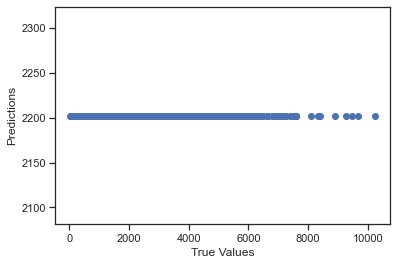

In [211]:
plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [214]:
# define dataframe for submission
model1 = test_num_cat[['Item_Identifier', 'Outlet_Identifier']]
model1['Item_Outlet_Sales'] = mean_sales


model1.to_csv('C:/Users/sg25017/Documents/ZS DSA/Analytics Vidhya/Big Mart Sales Prediction/model1.csv', index=False)



<ipython-input-214-a8ec38eacf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1['Item_Outlet_Sales'] = mean_sales


In [215]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

In [216]:
# pivot table with values Item_Outlet_Sales and index Item_Type_Category
X_train_num_cat['Item_Outlet_Sales'] = y_train_num_cat
item_category_sales_table = X_train_num_cat.pivot_table(values='Item_Outlet_Sales', index='Item_Type_Category')
item_category_sales_table

,Item_Outlet_Sales
Item_Type_Category,
0,2022.430537
1,2237.307754
2,2159.187339


In [217]:
# define function that returns the mean values
def find_sales_means(x):
    return item_category_sales_table.loc[x]

RMSE: 1651


Text(0, 0.5, 'Predictions')

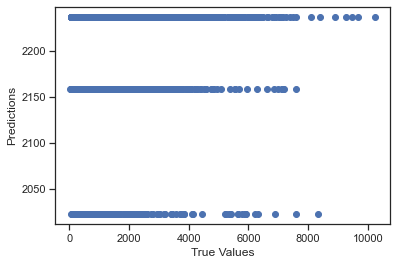

In [218]:
# evaluate model
X_test_num_cat['pred'] = X_test_num_cat['Item_Type_Category'].apply(find_sales_means)
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [219]:
# define submision model
model2 = test_num_cat[['Item_Identifier', 'Outlet_Identifier', 'Item_Type_Category']]
model2['Item_Outlet_Sales'] = model2['Item_Type_Category'].apply(find_sales_means)
model2 = model2.drop('Item_Type_Category', axis=1)

<ipython-input-219-8fc51cff0b0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model2['Item_Outlet_Sales'] = model2['Item_Type_Category'].apply(find_sales_means)


In [220]:

model2.to_csv('C:/Users/sg25017/Documents/ZS DSA/Analytics Vidhya/Big Mart Sales Prediction/model2.csv', index=False)



In [221]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

In [222]:
# pivot table with values Item_Outlet_Sales and index Item_Type_Category and Outlet_Category
X_train_num_cat['Item_Outlet_Sales'] = y_train_num_cat
item_outlet_sales_table = X_train_num_cat.pivot_table(values='Item_Outlet_Sales', 
                                            index='Item_Type_Category', 
                                            columns='Outlet_Type')
item_outlet_sales_table

Outlet_Type,0,1,2,3
Item_Type_Category,,,,
0,308.407437,2148.264504,1915.547572,3340.198538
1,344.858118,2361.702345,2061.157693,3767.855604
2,361.037616,2337.223838,2012.974133,3477.177489


In [223]:
# define function that returns the mean values
def find_sales_means(x):
    return item_outlet_sales_table.loc[x['Item_Type_Category'], x['Outlet_Type']]

RMSE: 1417


Text(0, 0.5, 'Predictions')

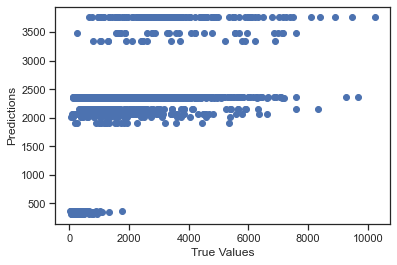

In [224]:
# eval model
# evaluate model
X_test_num_cat['pred'] = X_test_num_cat.apply(find_sales_means, axis=1)
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [225]:
# define submission file
model3 = test_num_cat[['Item_Identifier', 'Outlet_Identifier', 
               'Item_Type_Category', 'Outlet_Type']]

model3['Item_Outlet_Sales'] = model3.apply(find_sales_means, axis=1)
model3 = model3.drop(['Item_Type_Category', 'Outlet_Type'], axis=1)

# export submission file
#model3.to_csv('/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model3.csv', index=False)

model3.head(10)

<ipython-input-225-d521c9d5b139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model3['Item_Outlet_Sales'] = model3.apply(find_sales_means, axis=1)


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2361.702345
8524,FDW14,OUT017,2361.702345
8525,NCN55,OUT010,361.037616
8526,FDQ58,OUT017,2361.702345
8527,FDY38,OUT027,3767.855604
8528,FDH56,OUT046,2361.702345
8529,FDL48,OUT018,2061.157693
8530,FDC48,OUT027,3767.855604
8531,FDN33,OUT045,2361.702345
8532,FDA36,OUT017,2361.702345


In [226]:

model3.to_csv('C:/Users/sg25017/Documents/ZS DSA/Analytics Vidhya/Big Mart Sales Prediction/model3.csv', index=False)


In [227]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

In [232]:
train_num_cat.isnull().sum()


Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
Item_Type_Category         0
Item_MRP_Category          0
Outlet                     0
dtype: int64

In [228]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

estimator = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
selector = RFECV(estimator=estimator, cv=5)
selector = selector.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [185]:
train_data['Year'] = pd.to_datetime(train_data['Outlet_Establishment_Year']).dt.year

train_data = train_data.drop(['Outlet_Establishment_Year'], axis=1)

test_data['Year'] = pd.to_datetime(test_data['Outlet_Establishment_Year']).dt.year

test_data = test_data.drop(['Outlet_Establishment_Year'], axis=1)

In [186]:
#Examine Missing Values
#Next we can look at the number and percentage of missing values in each column

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [187]:
missing_data(train_data)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year
Total,0,1463,0,0,0,0,0,2410,0,0,0,0
Percent,0,17.1653,0,0,0,0,0,28.2764,0,0,0,0
Types,object,float64,object,float64,object,float64,object,object,object,object,float64,int64


In [188]:
#Heatmap. The missingno correlation heatmap measures nullity correlation:
#how strongly the presence or absence of one variable affects the presence of another:


'\nThe missingno correlation heatmap measures nullity correlation:\n#how strongly the presence or absence of one variable affects the presence of another:\nA value near -1 means if one variable appears then the other variable is very likely to be missing.\nA value near 0 means there is no dependence between the occurrence of missing values of two variables.\nA value near 1 means if one variable appears then the other variable is very likely to be present\n'

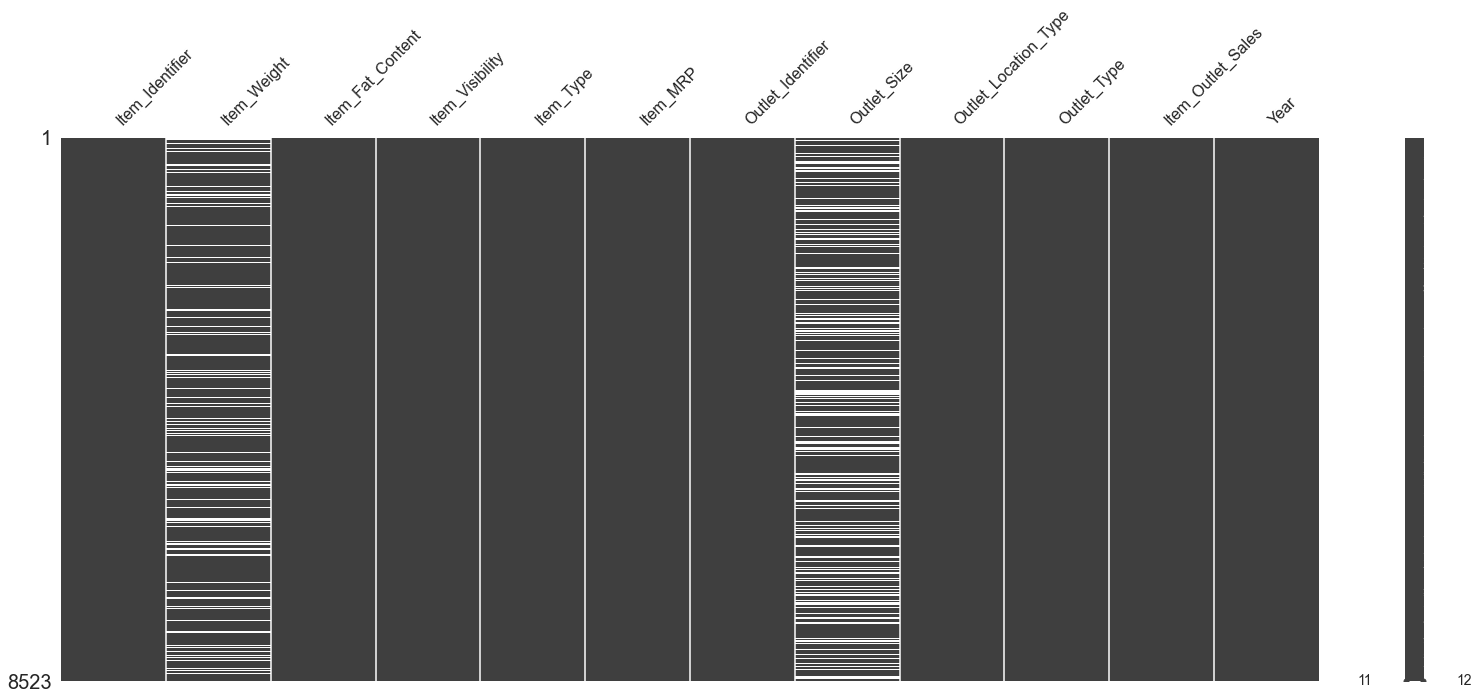

In [189]:
msno.matrix(train_data)
'''
The missingno correlation heatmap measures nullity correlation:
#how strongly the presence or absence of one variable affects the presence of another:
A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present
''' 

<AxesSubplot:>

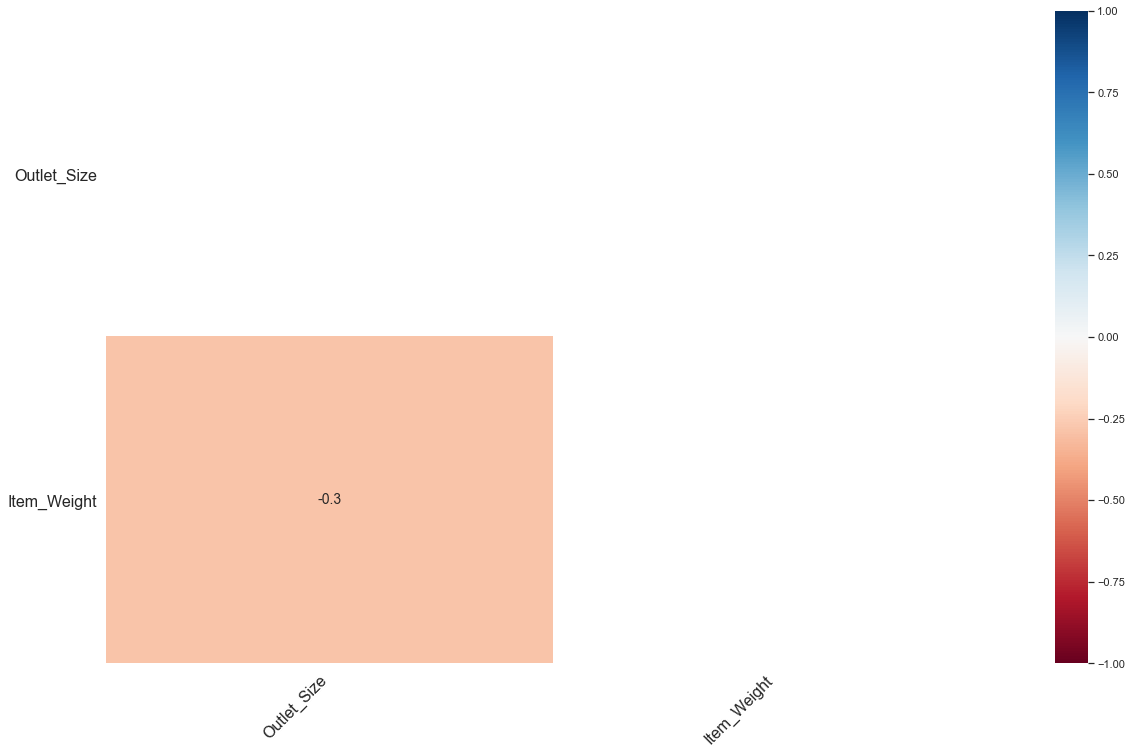

In [190]:
a = msno.heatmap(train_data, sort='ascending')
a

In [191]:
#Checking for MIssing Values 
#Here we will check the percentage of NaN values present in each feauture 
##1 Making a list of feautures with missing values 

NaN_feature = [i for i in train_data.columns if train_data[i].isnull().sum() >1]

for j in NaN_feature :
    print(j, np.round(train_data[j].isnull().mean(),4), ' % missing values')

Item_Weight 0.1717  % missing values
Outlet_Size 0.2828  % missing values


In [192]:
# Number of unique classes in each object column
train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

# Correlations
Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

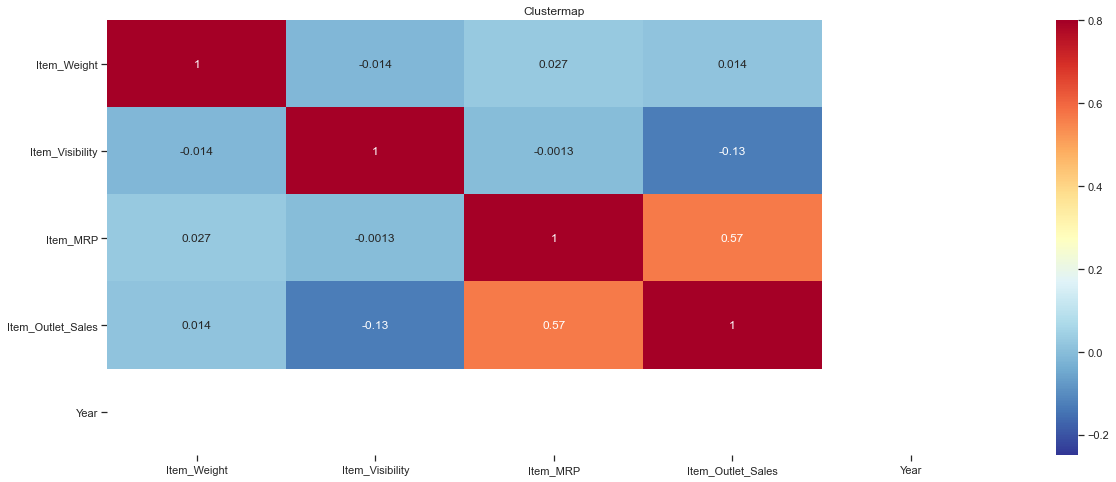

In [193]:
corrs = train_data.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)
plt.title('Clustermap');

In [194]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Year
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.0
mean,12.857645,0.066132,140.992782,2181.288914,1970.0
std,4.643456,0.051598,62.275067,1706.499616,0.0
min,4.555000,0.000000,31.290000,33.290000,1970.0
25%,8.773750,0.026989,93.826500,834.247400,1970.0
50%,12.600000,0.053931,143.012800,1794.331000,1970.0
75%,16.850000,0.094585,185.643700,3101.296400,1970.0
max,21.350000,0.328391,266.888400,13086.964800,1970.0


In [195]:
train_data.apply(lambda x: len(x.unique()))

Item_Identifier         1559
Item_Weight              416
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
Year                       1
dtype: int64

There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
There are 10 stores.
Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
There are only 16 Item_Type.

In [196]:
# filter the categorical variables
categorical_columns = [x for x in train_data.dtypes.index if train_data.dtypes[x]=='object']

# exclude the id 
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', ]]


# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(train_data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variabl


Observations:

Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.
Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.
Observations on Missing Values
The missing values of the Item_Outlet_Sales come from the test dataset.
The missing values of Item_Weight and Outlet_Size need to be imputed
The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.
Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
Observations on Data Analysis to be done
There are 10 stores.
Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
There are only 16 Item_Type.
Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.
Observations on Feature engineering to be done
It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.
There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

# Feature Selection
Find the optimal feature subset using an evaluation measure. The choice of evaluation metric distinguish the three main strategies of feature selection algorithms: the wrapper strategy, the filter strategy, and the embedded strategy

Filter methods:

information gain
chi-square test
correlation coefficient
variance threshold
Wrapper methods:

recursive feature elimination
sequential feature selection algorithms
Embedded methods:

L1 (LASSO) regularization
decision tree
In our case, we remove some useless, redundant variables. We will use three methods for feature selection: Remove collinear features, remove features with greater than a threshold percentage of missing values, keep only the most relevant features using feature importances from a model

https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [197]:
# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = train_data.corr().abs()
corr_matrix.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Year
Item_Weight,1.000000,0.014048,0.027141,0.014123,NaN
Item_Visibility,0.014048,1.000000,0.001315,0.128625,NaN
Item_MRP,0.027141,0.001315,1.000000,0.567574,NaN
Item_Outlet_Sales,0.014123,0.128625,0.567574,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN


In [198]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Year
Item_Weight,NaN,0.014048,0.027141,0.014123,NaN
Item_Visibility,NaN,NaN,0.001315,0.128625,NaN
Item_MRP,NaN,NaN,NaN,0.567574,NaN
Item_Outlet_Sales,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN


In [199]:
#Select columns with correlations above threshold

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
train_data = train_data.drop(columns = to_drop)
print('Data shape: ', train_data.shape)
print('Size of the data', train_data.shape)

There are 0 columns to remove.
Data shape:  (8523, 12)
Size of the data (8523, 12)


Remove Missing Values
In this implementation, if any columns have greater than 85% missing values, they will be removed.

https://github.com/Microsoft/LightGBM/blob/master/docs/Advanced-Topics.rst

In [200]:
## Dataset missing values (in percent)
dataset_missing = (train_data.isnull().sum() / len(train_data)).sort_values(ascending = False)
dataset_missing.head()

Outlet_Size          0.282764
Item_Weight          0.171653
Year                 0.000000
Item_Outlet_Sales    0.000000
Outlet_Type          0.000000
dtype: float64

In [201]:
# Identify missing values above threshold

dataset_missing_ = dataset_missing.index[dataset_missing > 0.90]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 90%% missing values' % len(all_missing))
dataset = train_data.drop(columns = all_missing)
print('Data shape: ', train_data.shape)

There are 0 columns with more than 90% missing values
Data shape:  (8523, 12)


# Feature Selection through Feature Importances
We want to see mos important features


import xgboost as xgb

train_y = train_data['Item_Outlet_Sales']
train_X = train_data.drop(["Item_Outlet_Sales", "Outlet_Establishment_Year","Item_Identifier"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# run after label encoding
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

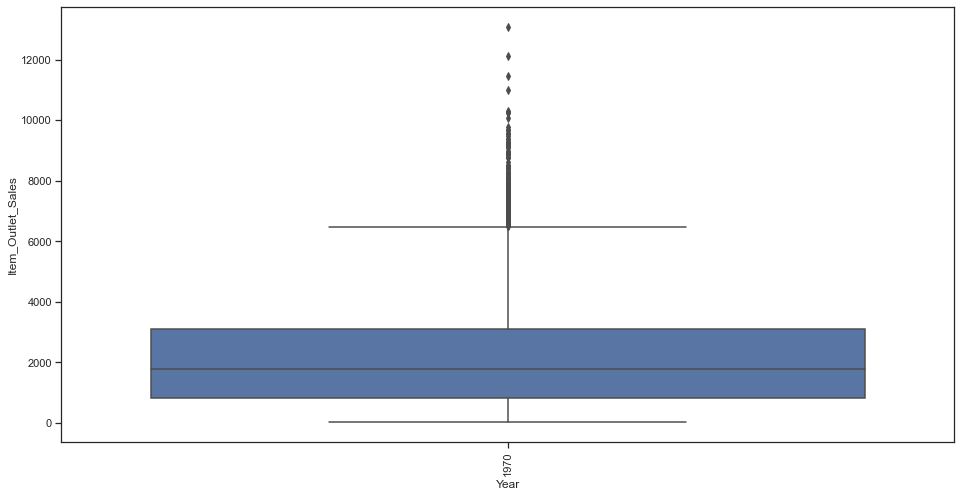

In [202]:
def box_plot_dist_var(var):
#     var = 'DayOfTheWeek'
    data_ = pd.concat([train_data['Item_Outlet_Sales'], dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_)
    plt.xticks(rotation=90);

box_plot_dist_var("Year")    

Limitation of label Encoding
Label encoding convert the data in machine readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issue in training of data sets. A label with high value may be considered to have high priority than a label having lower value.
Link : https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [203]:
from sklearn.preprocessing import LabelEncoder
#fill in mean for floats
for c in train_data.columns:
    if train_data[c].dtype=='float16' or  train_data[c].dtype=='float32' or  train_data[c].dtype=='float64':
        train_data[c].fillna(train_data[c].mean())

#fill in -999 for categoricals
train_data = train_data.fillna(-999)
# Label Encoding
for f in dataset.columns:
    if train_data[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train_data[f].values))
        train_data[f] = lbl.transform(list(train_data[f].values))
        
print('Labelling done.') 

Labelling done.


In [204]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year
0,156,9.300,1,0.016047,4,249.8092,9,2,0,1,3735.1380,1970
1,8,5.920,2,0.019278,14,48.2692,3,2,2,2,443.4228,1970
2,662,17.500,1,0.016760,10,141.6180,9,2,0,1,2097.2700,1970
3,1121,19.200,2,0.000000,6,182.0950,0,0,2,0,732.3800,1970
4,1297,8.930,1,0.000000,9,53.8614,1,1,2,1,994.7052,1970
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1,2,1,2778.3834,1970
8519,897,8.380,2,0.046982,0,108.1570,7,0,1,1,549.2850,1970
8520,1357,10.600,1,0.035186,8,85.1224,6,3,1,1,1193.1136,1970
8521,681,7.210,2,0.145221,13,103.1332,3,2,2,2,1845.5976,1970


In [205]:
from sklearn.preprocessing import LabelEncoder
#fill in mean for floats
for c in test_data.columns:
    if test_data[c].dtype=='float16' or  test_data[c].dtype=='float32' or  test_data[c].dtype=='float64':
        test_data[c].fillna(test_data[c].mean())

#fill in -999 for categoricals
test_data = test_data.fillna(-999)
# Label Encoding
for f in test_data.columns:
    if test_data[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(test_data[f].values))
        test_data[f] = lbl.transform(list(test_data[f].values))
        
print('Labelling done.') 


Labelling done.


In [206]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year
0,1103,20.750,1,0.007565,13,107.8622,9,2,0,1,1970
1,1067,8.300,4,0.038428,4,87.3198,2,0,1,1,1970
2,1406,14.600,1,0.099575,11,241.7538,0,0,2,0,1970
3,809,7.315,1,0.015388,13,155.0340,2,0,1,1,1970
4,1184,-999.000,2,0.118599,4,234.2300,5,2,2,3,1970
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,3,0,1,1970
5677,306,7.600,2,0.142991,15,169.1448,3,2,2,2,1970
5678,1412,10.000,1,0.073529,8,118.7440,7,0,1,1,1970
5679,517,15.300,2,0.000000,3,214.6218,2,0,1,1,1970


# Baseline Model
XGBoost Model

In [225]:
X = train_data.drop(['Item_Outlet_Sales',
'Item_Identifier'], axis=1) # data
y = train_data.Item_Outlet_Sales # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [226]:
data_test = test_data.drop([
'Item_Identifier'], axis=1)

In [227]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year
0,1103,20.750,1,0.007565,13,107.8622,9,2,0,1,1970
1,1067,8.300,4,0.038428,4,87.3198,2,0,1,1,1970
2,1406,14.600,1,0.099575,11,241.7538,0,0,2,0,1970
3,809,7.315,1,0.015388,13,155.0340,2,0,1,1,1970
4,1184,-999.000,2,0.118599,4,234.2300,5,2,2,3,1970
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,3,0,1,1970
5677,306,7.600,2,0.142991,15,169.1448,3,2,2,2,1970
5678,1412,10.000,1,0.073529,8,118.7440,7,0,1,1,1970
5679,517,15.300,2,0.000000,3,214.6218,2,0,1,1,1970


In [228]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5539, 10), (2984, 10), (5539,), (2984,))

In [229]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year
90,20.750,1,0.040421,6,122.1730,0,0,2,0,1970
4329,15.100,2,0.157155,6,62.2194,0,0,2,0,1970
7775,12.350,2,0.033813,10,198.1426,9,2,0,1,1970
5480,8.750,2,0.074779,6,186.3556,7,0,1,1,1970
4032,17.200,2,0.012012,3,163.1184,8,3,0,1,1970
...,...,...,...,...,...,...,...,...,...,...
5734,9.395,2,0.286345,6,139.1838,0,0,2,0,1970
5191,15.600,1,0.117575,5,75.6670,2,0,1,1,1970
5390,17.600,1,0.018944,8,237.3590,7,0,1,1,1970
860,20.350,3,0.054363,13,117.9466,2,0,1,1,1970


In [223]:
data_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year
0,20.750,1,0.007565,13,107.8622,9,2,0,1,1970
1,8.300,4,0.038428,4,87.3198,2,0,1,1,1970
2,14.600,1,0.099575,11,241.7538,0,0,2,0,1970
3,7.315,1,0.015388,13,155.0340,2,0,1,1,1970
4,-999.000,2,0.118599,4,234.2300,5,2,2,3,1970
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,8,3,0,1,1970
5677,7.600,2,0.142991,15,169.1448,3,2,2,2,1970
5678,10.000,1,0.073529,8,118.7440,7,0,1,1,1970
5679,15.300,2,0.000000,3,214.6218,2,0,1,1,1970


In [237]:
reg = xgb.XGBRegressor(n_estimators=500)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

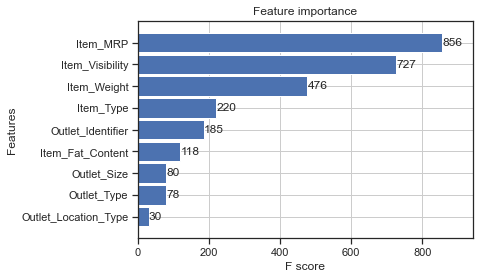

In [238]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(reg, height=0.9)

In [239]:
test_data.shape, data_test.shape

((5681, 11), (5681, 10))

In [240]:
data_test2 = data_test.copy()

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_true=train_data['Item_Outlet_Sales'],
                   y_pred=train_data['Item_Outlet_Sales_pred'])

1103491.0663711606

In [113]:
from statsmodels.tools.eval_measures import rmse
import datetime 
error=rmse(train_data['Item_Outlet_Sales'],
                   train_data['Item_Outlet_Sales_pred'])
error

1050.4718303558457

In [114]:

mean_absolute_error(y_true=train_data['Item_Outlet_Sales'],
                   y_pred=train_data['Item_Outlet_Sales_pred'])

726.7306532374972

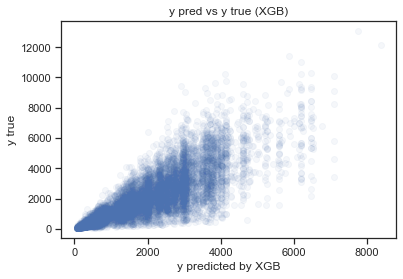

In [115]:
plt.scatter(train_data['Item_Outlet_Sales_pred'], train_data['Item_Outlet_Sales'], alpha = 0.05)
plt.xlabel("y predicted by XGB")
plt.ylabel("y true")
plt.title("y pred vs y true (XGB)")
plt.show()

In [241]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=80, max_depth=35)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=35, n_estimators=80)

In [244]:
data_test2['Item_Outlet_Sales_pred_rf'] = rf_reg.predict(data_test)


In [245]:
sample_submission['Item_Outlet_Sales'] = data_test2['Item_Outlet_Sales_pred_rf']

In [246]:
sample_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1496.610207
1,FDW14,OUT017,1224.680842
2,NCN55,OUT010,651.210658
3,FDQ58,OUT017,2241.998275
4,FDY38,OUT027,6197.416205
...,...,...,...
5676,FDB58,OUT046,2115.479630
5677,FDD47,OUT018,2762.845293
5678,NCO17,OUT045,2241.706987
5679,FDJ26,OUT017,4914.278123


In [247]:
sample_submission.to_csv('submission2_Sg.csv', index=False)

In [120]:
mean_squared_error(y_true=train_data['Item_Outlet_Sales'],
                   y_pred=train_data['Item_Outlet_Sales_pred_rf'])

577472.7210755954

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
clf = GridSearchCV(logreg, param_grid, cv=10)
clf.fit(X_train, y_train)

# Impute missing values
Item_Weight
Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the average Item_Weight of each Item_Identifier.

To check that we have imputed the values in a reasonable way, we can check the average weight per Outlet_Identifier before and after imputing the missing values.

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

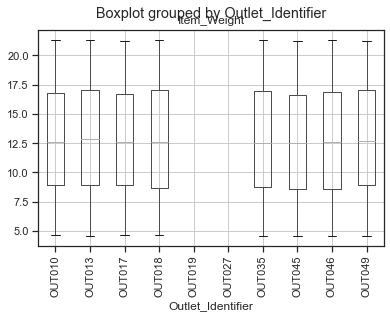

In [102]:
train_data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

In [104]:
item_av_weight = train_data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [108]:

# create a mask of the missing data in Item_Weight
null_mask_weight = train_data['Item_Weight'].isnull()

In [111]:
help(train_data.loc)
# impute values
#train_data.loc[null_mask_weight, 'Item_Weight'] = train_data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection by Labe

In [14]:
categorical_feautre = [i for i in train_data.columns if train_data[i].dtypes == 'O']
print('Number of categorical variables', len(categorical_feautre))
train_data[categorical_feautre].head()

Number of categorical variables 7


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [37]:

dataset_test2 = pd.get_dummies(train_data, columns=['Item_Fat_Content','Item_Type','Outlet_Size',
                                                   'Outlet_Location_Type','Outlet_Type'])


In [38]:
dataset_test2.shape

(8523, 38)

In [39]:
dataset_test2 = dataset_test2.fillna(0)

In [40]:
column_date = dataset_test2['Outlet_Establishment_Year']

In [41]:
dataset_test2['Year'] = pd.to_datetime(dataset_test2['Outlet_Establishment_Year']).dt.year

In [42]:
dataset_test2['Year']

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
8518    1970
8519    1970
8520    1970
8521    1970
8522    1970
Name: Year, Length: 8523, dtype: int64

In [61]:
X_train = dataset_test2.drop(['Item_Outlet_Sales','Outlet_Identifier',
'Item_Identifier','Outlet_Establishment_Year','Year'], axis=1) # data
y_train = dataset_test2.Item_Outlet_Sales # labels

In [62]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [63]:
X_train.shape,y_train.shape

((8523, 34), (8523,))

In [64]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [65]:
# Logistic Regression
import math, time, random, datetime
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

ValueError: Unknown label type: 'continuous'

In [66]:
v

In [67]:

clf_rf = RandomForestRegressor(n_estimators=150)
clf_rf.fit(x_train, y_train)
y_pred_rf=clf_rf.predict(x_val)
acc_rf= round(clf_rf.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 93 % 



In [69]:

rmse = np.sqrt(mean_squared_error(y_pred_rf, y_val))
rmse

1123.1300812120178

In [77]:
y_pred = clf_rf.predict(x_test)
y_pred

array([1557.00880933, 1270.28425867,  486.81520533, ..., 2067.10926   ,
       4766.71076533, 1503.63384267])

In [71]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [72]:

test_2 = pd.get_dummies(test_data, columns=['Item_Fat_Content','Item_Type','Outlet_Size',
                                                   'Outlet_Location_Type','Outlet_Type'])

In [73]:
test_2 = test_2.fillna(0)

In [76]:
x_test = test_2.drop(['Outlet_Identifier',
'Item_Identifier','Outlet_Establishment_Year'], axis=1) # data

In [80]:
y_pred.shape

(5681,)

In [82]:
sample_submission['Item_Outlet_Sales'] = y_pred

In [83]:
sample_submission.to_csv('submission1_Sg.csv', index=False)

In [84]:
pwd()

'C:\\Users\\sg25017'